## 01. Import libraries & data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Use variable path 
path = r'/Users/rose/Documents/Career Foundry/Instacart Basket Analysis'

In [3]:
# Import customers.csv, assign to a variable (df_customers)
df_customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'), index_col = False)

In [4]:
# Import latest ords dataframe: 'ords_prods_merge_aggregation2.pkl', assign to a variable ('ords_prods_marged')
ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_aggregation2.pkl')) 

In [5]:
ords_prods_merged.shape

(32404859, 24)

In [6]:
ords_prods_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spend_flag', 'order_frequency', 'frequency_flag'],
      dtype='object')

In [7]:
# Delete the column '_merge' using drop() function
ords_prods_merged = ords_prods_merged.drop(columns=['_merge'])

In [8]:
# check if column is successfully dropped
ords_prods_merged.shape

(32404859, 23)

## 02. Data Cleaning, Wrangling

In [9]:
# Print the first few rows of the new imported dataset, to get a sense of what the dataframe looks like, and its content
df_customers.head(2)

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285


In [10]:
# Rename column names for consistency
df_customers.rename(columns = {'First Name' : 'first_name', 'Surnam': 'last_name', 'Gender': 'gender', 'STATE': 'state', 'Age': 'age'}, inplace = True)

In [11]:
# Check if renames was successful
df_customers.head(1)

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665


In [12]:
# Consistency check
df_customers.describe()

,user_id,age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


## Finding and Fixing missing values 

In [13]:
# find missing values
df_customers.isnull().sum() 

user_id             0
first_name      11259
last_name           0
gender              0
state               0
age                 0
date_joined         0
n_dependants        0
fam_status          0
income              0
dtype: int64

In [14]:
df_customers.shape

(206209, 10)

In [15]:
# Create a dataframe with missing values 
df_customers_nan = df_customers[df_customers['first_name'].isnull() == True]

In [16]:
df_customers_nan.shape

(11259, 10)

In [17]:
df_customers_nan.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
53,76659,NaN,Gilbert,Male,Colorado,26,1/1/2017,2,married,41709
73,13738,NaN,Frost,Female,Louisiana,39,1/1/2017,0,single,82518
82,89996,NaN,Dawson,Female,Oregon,52,1/1/2017,3,married,117099
99,96166,NaN,Oconnor,Male,Oklahoma,51,1/1/2017,1,married,155673
105,29778,NaN,Dawson,Female,Utah,63,1/1/2017,3,married,151819


In [18]:
# Create a dataframe without the missing values 
df_customers_clean = df_customers[df_customers['first_name'].isnull() == False]

In [19]:
df_customers_clean.shape

(194950, 10)

In [20]:
# Check lenth (number of rows) for the entire customers dataframe
len(df_customers)

206209

In [21]:
# Check lenth (number of rows) for the two seubsets that make up the customers dataframe
len(df_customers_nan) + len(df_customers_clean)

206209

## Finding duplicates

In [22]:
# Find duplicates
df_dups = df_customers_clean[df_customers_clean.duplicated()]

In [23]:
df_dups

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income


In [24]:
df_dups.shape

(0, 10)

No duplicates found

### Consistency checks

In [25]:
df_customers_clean.describe()

,user_id,age,n_dependants,income
count,194950.000000,194950.000000,194950.000000,194950.000000
mean,103140.014947,49.511167,1.499600,94664.811495
std,59527.705810,18.476519,1.117959,42477.262653
min,1.000000,18.000000,0.000000,25903.000000
25%,51597.250000,33.000000,0.000000,59924.000000
50%,103091.500000,49.000000,1.000000,93572.500000
75%,154700.750000,66.000000,2.000000,124261.000000
max,206209.000000,81.000000,3.000000,593901.000000


<Axes: ylabel='Frequency'>

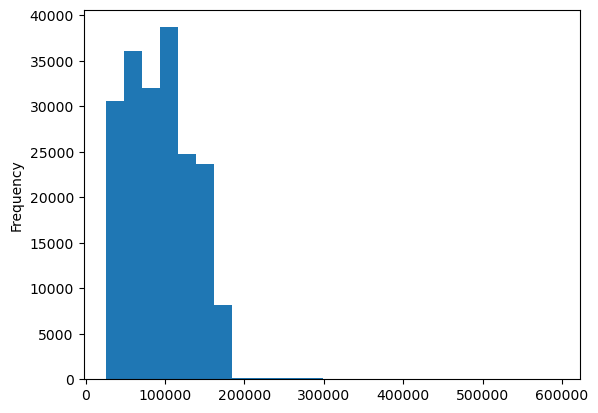

In [26]:
df_customers_clean['income'].plot.hist(bins = 25)

Comment: The median income (of 93572.5) is less than the mean income (of 94664.8), indicating that the income distribution might be slightly skewed towards lower values, and presence of outliers that pull the mean higher than the median. The std (of 42477.3) indicates the spread of incomes around the mean. The max (of 593901) is an outlier. 

In [27]:
df_customers_clean['income'].describe()

count    194950.000000
mean      94664.811495
std       42477.262653
min       25903.000000
25%       59924.000000
50%       93572.500000
75%      124261.000000
max      593901.000000
Name: income, dtype: float64

### Finding Mix type columns

In [28]:
# Test for any mixed-type columns:
for col in df_customers_clean.columns.tolist():
  weird = (df_customers_clean[[col]].map(type) != df_customers_clean[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_customers_clean[weird]) > 0:
    print (col)

There are no mix type columns. In the previous section, under 'Finding and Fixing Missing values', we found some missing values in the 'first_name' column and fixed it by isolating them into a new dataframe.

In [29]:
# Test if 'age' contains mixed types. Use unique() function to investigate further
print(sorted(df_customers_clean['age'].unique()))

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]


In [30]:
# Test 'n_dependants' contains mixed types. Use unique() function to investigate further
print(sorted(df_customers_clean['n_dependants'].unique()))

[0, 1, 2, 3]


## Combining dataframes

In [31]:
# Prep for merge--look for common key ('user_id)'
df_customers_clean.head(1)

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665


In [32]:
df_customers_clean.shape

(194950, 10)

In [33]:
ords_prods_merged.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spend_flag,order_frequency,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid Price Range,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.5,Non-Frequent customer


In [34]:
ords_prods_merged.shape

(32404859, 23)

In [35]:
# 'user_id' is common column and will use as key; check data type for 'user_in' in the two dataframes being combined
ords_prods_merged['user_id'].dtype

dtype('int64')

In [36]:
# Check data type
df_customers_clean['user_id'].dtype

dtype('int64')

In [37]:
ords_prods_merged.shape

(32404859, 23)

In [38]:
df_customers_clean.shape

(194950, 10)

In [39]:
# Combine dataframe using merge

In [40]:
df_ords_prods_cust = ords_prods_merged.merge(df_customers_clean, on = 'user_id', how = 'inner', indicator = True)

In [41]:
df_ords_prods_cust.shape

(30629741, 33)

In [42]:
df_ords_prods_cust.head(2)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [43]:
# Check inner join value counts
df_ords_prods_cust['_merge'].value_counts()

_merge
both          30629741
left_only            0
right_only           0
Name: count, dtype: int64

In [44]:
df_ords_prods_cust['prices'].max()

25.0

In [47]:
# Check frequency for loyalty flag
df_ords_prods_cust['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Loyal customer      13410522
Regular customer    11317058
New customer         5902161
Name: count, dtype: int64

## 3.0 Exporting Dataframe

In [48]:
df_ords_prods_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_combined.pkl'))